**Predicting Sex from Various Crime Tags**

importing containers 

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree
from Clean_Data import data_cleaner
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
checkData = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
checkData.shape

(617347, 28)

In [3]:
#call columns and change names

data2020 = data_cleaner("Crime_Data_from_2020_to_Present.csv")

data2020.keepColumns(["Rpt Dist No", "Crm Cd", "DATE OCC", "Vict Age", "Vict Descent", "Vict Sex"]) 

oldNames = ["Rpt Dist No", "Crm Cd", "DATE OCC", "Vict Age", "Vict Descent", "Vict Sex"]
newNames = ["District","Code", "Date", "Age", "Descent", "Sex"]
data2020.changeName(oldNames, newNames)

In [4]:
#change the date/time to only dates format
data2020.onlyDate("Date")

In [5]:
#drop the NaN rows
data2020.delNa()

In [6]:
# drop victims with unknown sex
try:
    data2020.toNum()
except TypeError:
    #dont know what this should print cuz the typeerror will already say the error 
    print("There were victim's with unknown sex, will delete all rows of victim's with unknown sex.") 
    data2020.delRows() #deletes both unknown descent and unknown sex.
    data2020.toNum()
finally:
    print("Finished changing victim's sex to numbers (F = 0; M = 1)")

There were victim's with unknown sex, will delete all rows of victim's with unknown sex.
Finished changing victim's sex to numbers (F = 0; M = 1)


In [7]:
#convert into a data frame
crimedata = data2020.createDF()
crimedata

,District,Code,Date,Age,Descent,Sex
0,377,624,2020-01-08,36,1,0
1,163,624,2020-01-01,25,6,1
3,1543,745,2020-01-01,76,16,0
5,163,121,2020-01-01,25,6,0
6,161,442,2020-01-02,23,6,1
...,...,...,...,...,...,...
617340,1512,420,2022-06-09,46,11,1
617341,239,210,2022-06-09,33,6,1
617342,1249,626,2022-06-07,57,1,0
617343,334,354,2022-08-02,34,6,0


In [8]:
#create the x and y variables
#use everything but sex and date
#y = predictor variable

X = crimedata.drop(['Sex', 'Date'], axis=1) 
y = crimedata["Sex"]

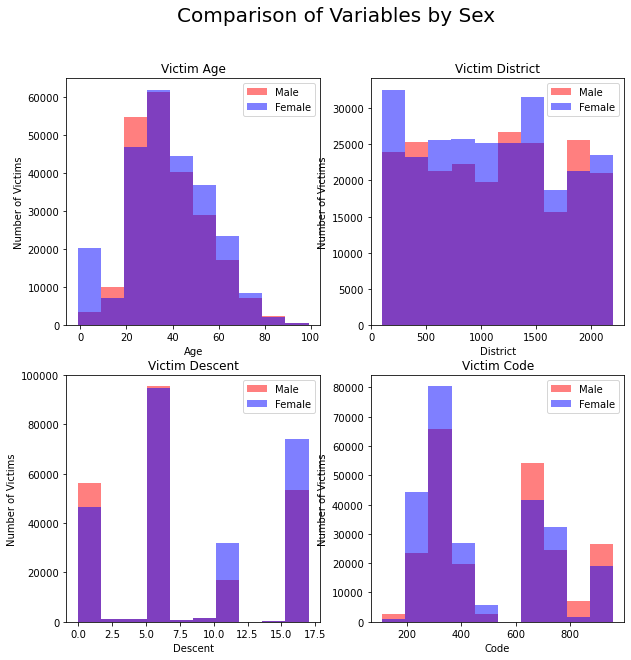

In [9]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
M = crimedata[crimedata["Sex"]== 1]
F = crimedata[crimedata["Sex"]== 0]
plt.suptitle("Comparison of Variables by Sex", fontsize=20)
ax[0,0].set(title="Victim Age", xlabel="Age", ylabel= 'Number of Victims')
ax[0,0].hist(F["Age"], color = "red", alpha = 0.5, label = "Female")
ax[0,0].hist(M["Age"], color = "blue", alpha = 0.5, label = "Male")
ax[1,0].set(title="Victim Descent", xlabel="Descent", ylabel= 'Number of Victims')
ax[1,0].hist(F["Descent"], color = "red", alpha = 0.5, label = "Female")
ax[1,0].hist(M["Descent"], color = "blue", alpha = 0.5, label = "Male")
ax[0,1].set(title="Victim District", xlabel="District", ylabel= 'Number of Victims')
ax[0,1].hist(F["District"], color = "red", alpha = 0.5, label = "Female")
ax[0,1].hist(M["District"], color = "blue", alpha = 0.5, label = "Male")
ax[1,1].set(title="Victim Code", xlabel="Code", ylabel= 'Number of Victims')
ax[1,1].hist(F["Code"], color = "red", alpha = 0.5, label = "Female")
ax[1,1].hist(M["Code"], color = "blue", alpha = 0.5, label = "Male")
ax[0,0].legend(('Male', 'Female'), loc='upper right')
ax[1,0].legend(('Male', 'Female'), loc='upper right')
ax[0,1].legend(('Male', 'Female'), loc='upper right')
ax[1,1].legend(('Male', 'Female'), loc='upper right')

In [10]:
#decision tree functions from lecture 20

def fit_tree(X, y, d):
    T = tree.DecisionTreeClassifier(max_depth=d)
    T.fit(X, y)
    return T

def plot_tree(T, cols, figsize=(10,10)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    p = tree.plot_tree(T, filled=True, feature_names=cols)
    plt.show()

In [11]:
#split the training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

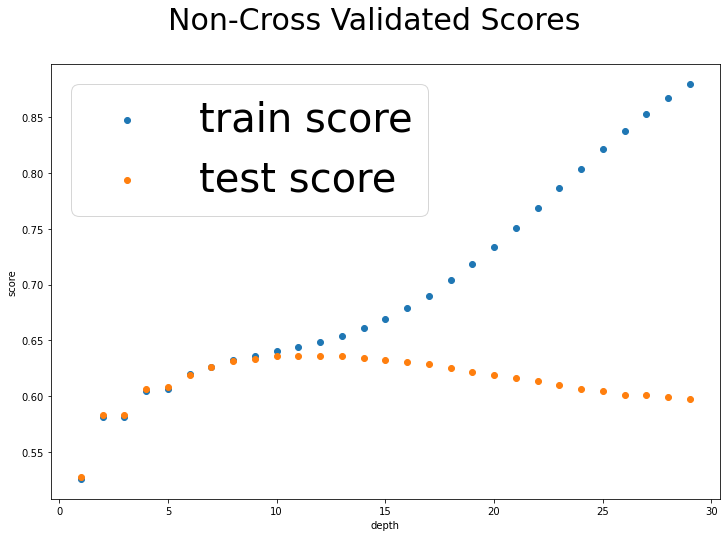

0.6365697908985934


In [12]:
#determine the best max depth without using cross validation

fig, ax = plt.subplots(1, figsize= (12, 8))
fig.suptitle('Non-Cross Validated Scores', fontsize=30)
depths = range(1, 30)
train_scores = []
test_scores = []

for d in depths:
    T = fit_tree(X_train, y_train, d)
    train_score = T.score(X_train, y_train)
    test_score = T.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

ax.scatter(depths, train_scores, label='train score')
ax.scatter(depths, test_scores, label='test score')
ax.set(xlabel="depth", ylabel= 'score')
plt.legend(fontsize=40)
plt.show()

print(max(test_scores))




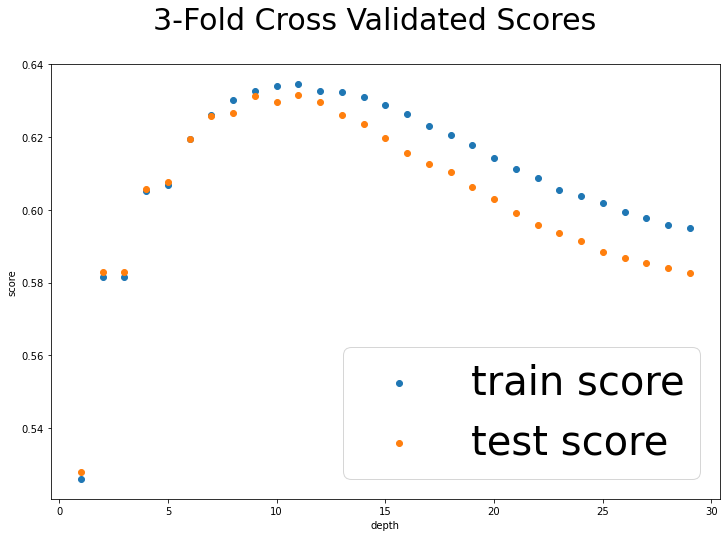

0.6313805105206578


In [17]:
# Determine the best max depth using 3-fold cross validation

fig, ax = plt.subplots(1, figsize= (12, 8))
fig.suptitle('3-Fold Cross Validated Scores', fontsize=30)
depths = range(1, 30)
train_scores = []
test_scores = []

for d in depths:  
    T = fit_tree(X_train, y_train, d)
    
    cv_train_scores = cross_val_score(T, X_train, y_train, cv=3)
    cv_test_scores = cross_val_score(T, X_test, y_test, cv=3)
    
    train_score = cv_train_scores.mean()
    test_score = cv_test_scores.mean()
    
    train_scores.append(train_score)
    test_scores.append(test_score)

ax.scatter(depths, train_scores, label='train score')
ax.scatter(depths, test_scores, label='test score')
ax.set(xlabel="depth", ylabel= 'score')
plt.legend(fontsize=40)
plt.show()

print(max(test_scores))

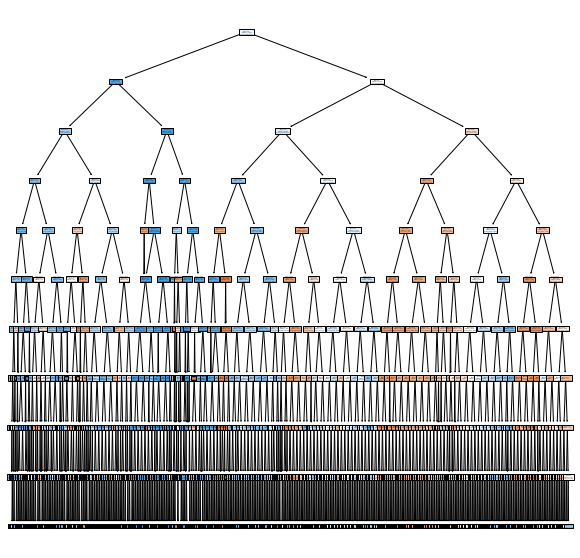

0.6391008197131839


In [13]:
#decision tree
T2 = fit_tree(X,y, 10)
plot_tree(T2, X.columns)
print(T2.score(X,y))